In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import numpy as np
import scipy
import statsmodels.api as sm

In [2]:
# Started at 1:26, 12/08/2024

In [3]:
NUM_SAMPLES = 2

In [4]:
with open('randomgridsearch.pkl', 'rb') as f:
    gsdf = pickle.load(f)

In [5]:
gsdf = gsdf[gsdf['max_features'] > 0]
gsdf

,max_features,max_depth,max_samples,threshold,frid_t_0,frid_p_0,senm_t_0,senm_p_0,sasp_t_0,sasp_p_0,...,sasp_t_1,sasp_p_1,mt_t_1,mt_p_1,pct_tot_iso_1,pct_pos_iso_1,percent_pos_1,score_1,moran_1,geary_1
0,999.0,1.0,0.867002,0.614782,8.569816,1.336470e-11,8.315957,3.547737e-11,9.949983,1.462481e-13,...,4.460405,2.071616e-05,-4.284447,9.999646e-01,0.014401,0.603774,0.023852,1.0000,0.331514,0.670524
1,1192.0,11.0,0.752816,0.671348,13.989771,2.838551e-35,14.873318,5.077183e-38,16.675979,1.200693e-45,...,8.686738,6.639783e-17,-6.726417,1.000000e+00,0.036904,0.288732,0.127813,1.0000,0.303547,0.696227
2,822.0,15.0,0.720585,0.620369,15.294982,2.714264e-44,17.371458,1.620094e-53,20.415163,3.548231e-69,...,9.443321,6.172679e-20,-7.039744,1.000000e+00,0.039604,0.234667,0.168767,1.0000,0.340183,0.660708
3,271.0,3.0,0.716765,0.570216,15.877813,2.106957e-46,17.279329,5.900873e-52,19.588677,2.161746e-63,...,11.977510,3.004452e-29,-4.839693,9.999991e-01,0.034203,0.222222,0.153915,1.0000,0.408553,0.593404
4,161.0,6.0,0.359537,0.581143,10.749819,2.023286e-25,13.728748,2.434738e-38,17.099897,1.647365e-55,...,10.748724,1.373474e-24,-5.247040,9.999999e-01,0.040054,0.244505,0.163816,0.9875,0.384098,0.618869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9967,273.0,13.0,0.813534,0.634865,15.852533,7.335343e-40,16.818579,1.830760e-42,19.421023,1.011599e-51,...,10.565893,7.463422e-21,-5.465056,9.999999e-01,0.018902,0.270968,0.069757,1.0000,0.404257,0.597195
9968,570.0,6.0,0.900997,0.611276,14.876018,2.585721e-42,16.764916,1.534134e-50,19.449176,4.301198e-64,...,9.273853,1.912636e-19,-8.164175,1.000000e+00,0.041854,0.234848,0.178218,1.0000,0.368356,0.632478
9969,258.0,8.0,0.180033,0.579472,12.734192,1.283800e-34,15.957566,1.103149e-50,19.366308,2.691518e-70,...,11.052635,3.605419e-27,-7.361873,1.000000e+00,0.040954,0.150662,0.271827,0.9875,0.405362,0.595551
9970,42.0,9.0,0.493643,0.520025,12.894816,6.203389e-33,10.134558,1.040561e-22,6.842076,1.045492e-11,...,18.642718,1.763313e-72,10.406126,4.366653e-25,0.019352,0.037359,0.518002,0.9375,0.447672,0.554903


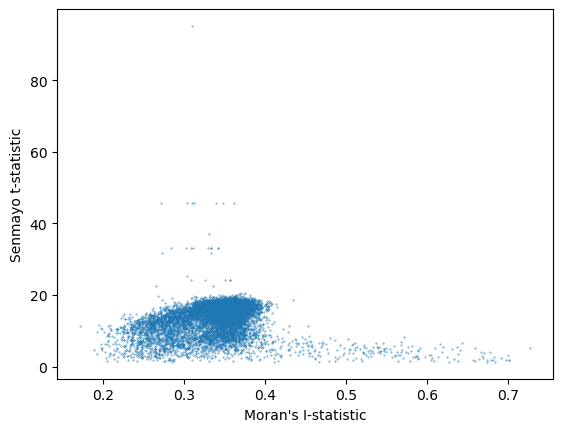

In [6]:
plt.scatter(gsdf['moran_0'], gsdf['senm_t_0'], s = 0.1)
plt.ylabel('Senmayo t-statistic')
plt.xlabel("Moran's I-statistic")
plt.show()

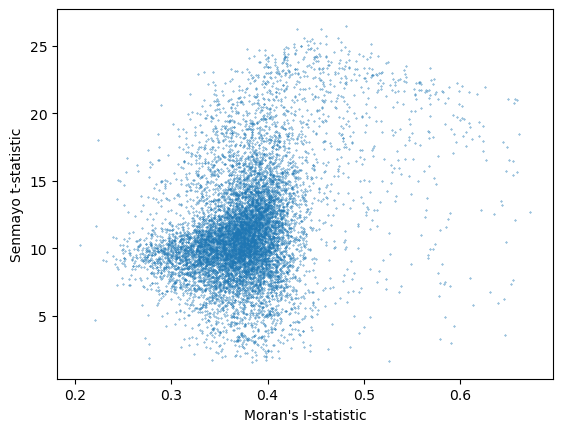

In [7]:
plt.scatter(gsdf['moran_1'], gsdf['senm_t_1'], s = 0.1)
plt.ylabel('Senmayo t-statistic')
plt.xlabel("Moran's I-statistic")
plt.show()

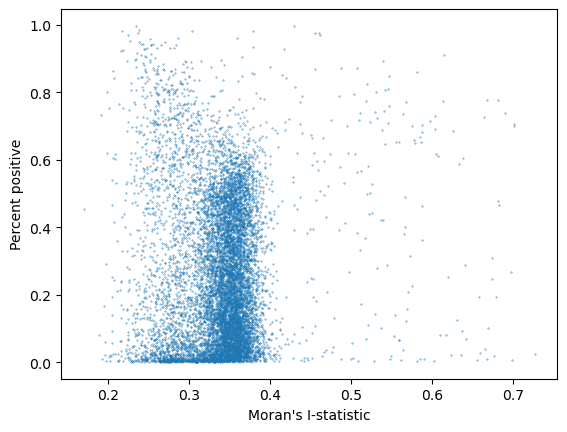

In [8]:
plt.scatter(gsdf['moran_0'], gsdf['percent_pos_0'], s = 0.1); 
plt.ylabel('Percent positive')
plt.xlabel("Moran's I-statistic")
plt.show()

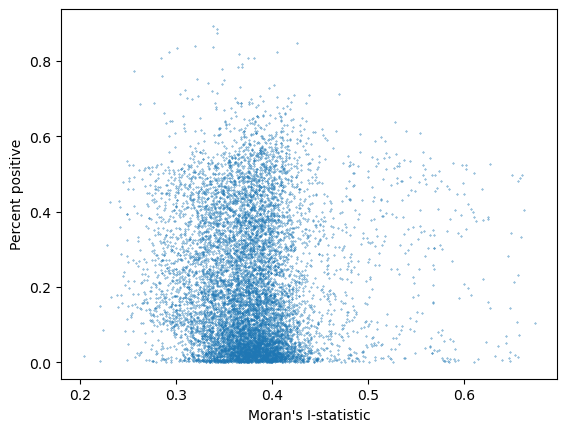

In [9]:
plt.scatter(gsdf['moran_1'], gsdf['percent_pos_1'], s = 0.1)
plt.ylabel('Percent positive')
plt.xlabel("Moran's I-statistic")
plt.show()

In [10]:
original_max_features = gsdf['max_features']

In [11]:
gsdf['max_features'] = np.log(gsdf['max_features'])

In [12]:
vars = ['max_features', 'max_depth', 'max_samples']
metrics = ['senm_t', 'frid_t', 'sasp_t']
autocorr_metric = 'moran'
weights = [4, 3, 2]
autocorr_weight = 1

# Determine the optimal threshold first:
threshold_curves = []
for m_i, m in enumerate(metrics):
    lowess_per_sample = []
    for df_i in range(0, NUM_SAMPLES):
        lowess = sm.nonparametric.lowess(gsdf[f'{m}_{df_i}'], gsdf['threshold'])
        lowess[:, 1] = lowess[:, 1] - lowess[:, 1].min()
        lowess[:, 1] = lowess[:, 1] / lowess[:, 1].max()
        lowess_per_sample.append(lowess)

    to_append = np.zeros((len(lowess_per_sample[0]), 2))
    to_append[:, 0] = lowess_per_sample[0][:, 0]
    to_append[:, 1] = [sum(x) for x in zip(*[x[:, 1] for x in lowess_per_sample])]
    threshold_curves.append(to_append)

threshold_df = pd.DataFrame(
    [l[:, 1] for l in threshold_curves],
    index = metrics
).T
# Apply the weights and sum
threshold_df = threshold_df.mul(weights)
threshold_df['total'] = threshold_df.sum(axis = 1)
threshold_df['x'] = threshold_curves[0][:, 0]

threshold_optima = threshold_df.iloc[threshold_df['total'].idxmax(axis = 0)]['x']
print(f'x = {threshold_optima:.3f} optimal threshold')

x = 0.584 optimal threshold


In [13]:
# And then subset the remaining data and find the other best parameters
gsdf_subset = gsdf[(gsdf['threshold'] > (threshold_optima - 0.01)) & (gsdf['threshold'] < (threshold_optima + 0.01))]

metrics = metrics + [autocorr_metric]
weights = weights + [autocorr_weight]
optima = []

lowess_curves = []
for m_i, m in enumerate(metrics):
    
    # We calculate the lowess curve for each sample on the subset of the grid search df 
    lowess_per_var = []
    for v_i, v in enumerate(vars):
        lowess_per_sample = []
        for df_i in range(0, NUM_SAMPLES):
            lowess_per_sample.append(
                sm.nonparametric.lowess(gsdf_subset[f'{m}_{df_i}'], gsdf_subset[v])
            )
        lowess_per_var.append(lowess_per_sample)

    # We normalize the lowess curves collectively by metric, rather than individually, so small differences in one metric
    #     don't get unduly exacerbated
    for df_i in range(0, NUM_SAMPLES):
        min_y = min([min(lowess_per_var[var_idx][df_i][:, 1]) for var_idx in range(0, len(vars))])
        max_y = max([max(lowess_per_var[var_idx][df_i][:, 1]) for var_idx in range(0, len(vars))])

        for var_idx in range(0, len(vars)):
            L = lowess_per_var[var_idx][df_i][:, 1]
            L = L - min_y
            L = L / (max_y - min_y)
            L = L - L.min()
            lowess_per_var[var_idx][df_i][:, 1] = L

    lowess_curves.append(lowess_per_var)    

# Because it's incredibly confusing at this point, for reference the indexing goes like this:
# lowess_curves[ METRIC IDX ][ VARIABLE IDX ][ DF IDX ][ AXIS ]
# We're now gonna flatten down the DF idx bit since we want to look at both df's together (sum the results)
lowesses = []
for m_i, _ in enumerate(metrics):
    sub_lowesses = []
    for v_i, _ in enumerate(vars):
        to_append = np.zeros((len(lowess_curves[m_i][v_i][0]), 2))
        to_append[:, 0] = lowess_curves[m_i][v_i][0][:, 0]
        to_append[:, 1] = [sum(x) for x in zip(*[x[:, 1] for x in lowess_curves[m_i][v_i]])]
        sub_lowesses.append(to_append)

    lowesses.append(sub_lowesses)

# It should now be:
# lowesses[ METRIC IDX ][ VARIABLE IDX ][ AXIS ]
for v_i, v in enumerate(vars):
    this_var_lowesses = [lowesses[x][v_i] for x in range(0, len(metrics))]
    lowess_df = pd.DataFrame(
        [l[:, 1] for l in this_var_lowesses],
        index = metrics
    ).T
    # Apply the weights and sum
    lowess_df = lowess_df.mul(weights)
    lowess_df['total'] = lowess_df.sum(axis = 1)
    lowess_df['x'] = this_var_lowesses[0][:, 0]

    x_max = lowess_df.iloc[lowess_df['total'].idxmax(axis = 0)]['x']
    print(f'x = {x_max:.6f} optimal for {v}')
    optima.append(x_max)    

optima.append(threshold_optima)

x = 4.997212 optimal for max_features
x = 11.000000 optimal for max_depth
x = 0.998605 optimal for max_samples


In [14]:
"""
# rewrite this so the normalization happens on the basis of the largest change; doing the threshold checking seperately (and initially?)

vars = ['max_features', 'max_depth', 'max_leaf_nodes', 'max_samples', 'threshold']
metrics = ['senm_t', 'frid_t', 'sasp_t', 'moran']
weights = [5, 1, 1, 1]
optima = []

for v_i, v in enumerate(vars):
    lowess = []

    if v == 'threshold': # Super janky
        metrics = metrics[:3]
        weights = weights[:3]
        
    for m_i, m in enumerate(metrics):
        # Calculate the lowess curve for each sample
        lowess_per_sample = []
        for df_i in range(0, NUM_SAMPLES):
            lowess_per_sample.append(
                sm.nonparametric.lowess(
                    gsdf[f'{m}_{df_i}'],
                    gsdf[v]
                )
            )

        # Normalize to between 0 and 1
        for l in lowess_per_sample:
            l[:, 1] = l[:, 1] - l[:, 1].min()
            l[:, 1] = l[:, 1] / l[:, 1].max()

        # Sum the normalized curves and append
        to_append = np.zeros((len(lowess_per_sample[0]), 2))
        to_append[:, 0] = lowess_per_sample[0][:, 0]

        for l in lowess_per_sample:
            to_append[:, 1] = to_append[:, 1] + l[:, 1]

        to_append[:, 1] = to_append[:, 1] - to_append[:, 1].min()
        to_append[:, 1] = to_append[:, 1] / to_append[:, 1].max()
        lowess.append(to_append)

    # Create a dataframe for easier processing
    lowess_df = pd.DataFrame(
        [l[:, 1] for l in lowess],
        index = metrics
    ).T
    # Apply the weights and sum
    lowess_df = lowess_df.mul(weights)
    lowess_df['total'] = lowess_df.sum(axis = 1)
    lowess_df['x'] = l[:, 0]

    x_max = lowess_df.iloc[lowess_df['total'].idxmax(axis = 0)]['x']
    print(f'x = {x_max:.3f} optimal for {v}')
    optima.append(x_max)
"""

"\n# rewrite this so the normalization happens on the basis of the largest change; doing the threshold checking seperately (and initially?)\n\nvars = ['max_features', 'max_depth', 'max_leaf_nodes', 'max_samples', 'threshold']\nmetrics = ['senm_t', 'frid_t', 'sasp_t', 'moran']\nweights = [5, 1, 1, 1]\noptima = []\n\nfor v_i, v in enumerate(vars):\n    lowess = []\n\n    if v == 'threshold': # Super janky\n        metrics = metrics[:3]\n        weights = weights[:3]\n        \n    for m_i, m in enumerate(metrics):\n        # Calculate the lowess curve for each sample\n        lowess_per_sample = []\n        for df_i in range(0, NUM_SAMPLES):\n            lowess_per_sample.append(\n                sm.nonparametric.lowess(\n                    gsdf[f'{m}_{df_i}'],\n                    gsdf[v]\n                )\n            )\n\n        # Normalize to between 0 and 1\n        for l in lowess_per_sample:\n            l[:, 1] = l[:, 1] - l[:, 1].min()\n            l[:, 1] = l[:, 1] / l[:, 1]

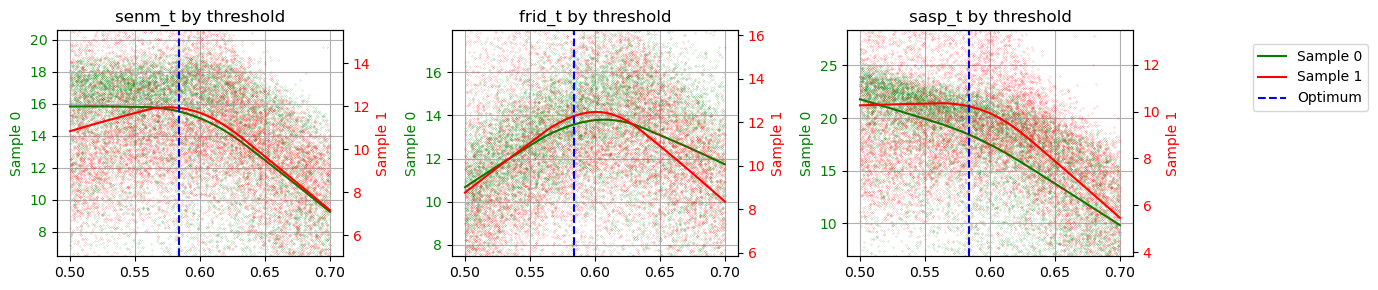

In [15]:
vars = ['threshold']
metrics = ['senm_t', 'frid_t', 'sasp_t']
q = 0.0

fig, ax = plt.subplots(len(vars), len(metrics))
fig.set_figwidth(4*len(metrics))
fig.set_figheight(3*len(vars))

for m_i, m in enumerate(metrics):
    ax1 = ax[m_i]
    ax2 = ax1.twinx()
    axes = [ax1, ax2]
    colours = ['g', 'r']

    # add lowess list structure, and do it like that
    # set the ylimits of the graph to make them easier to understand
    lowess = [None] *  NUM_SAMPLES
    
    for df_i in range(0, NUM_SAMPLES):
        this_ax = axes[df_i]
        this_colour = colours[df_i]
        
        this_ax.scatter(gsdf['threshold'], gsdf[f'{m}_{df_i}'], c = this_colour, s = 0.01)
        
        lowess[df_i] = sm.nonparametric.lowess(
            gsdf[f'{m}_{df_i}'],
            gsdf['threshold']
        )
        this_ax.plot(
            lowess[df_i][:, 0],
            lowess[df_i][:, 1],
            c = this_colour,
            label = f'Sample {df_i}'
        )
        ylims = (lowess[df_i][:, 1].min() * 0.7, lowess[df_i][:, 1].max() * 1.3)
        this_ax.set_ylim(bottom = ylims[0], top = ylims[1])
        
        this_ax.set_ylabel(f'Sample {df_i}', color = this_colour)
        this_ax.tick_params(axis = 'y', labelcolor = this_colour)

        #if v == 'max_features':
        #    this_ax.set_xscale('log')
    
    for l in lowess:
        l[:, 1] = l[:, 1] - l[:, 1].min()
        l[:, 1] = l[:, 1] / l[:, 1].max()

    lowess_total = np.zeros((len(lowess[0]), 2))
    lowess_total[:, 0] = lowess[0][:, 0]
    for l in lowess:
        lowess_total[:, 1] = lowess_total[:, 1] + l[:, 1]

    optimal_x = lowess_total[:, 0][np.argmax(lowess_total[:, 1])]
    ax2.vlines(optima[-1], ylims[0], ylims[1], color = 'b', label = 'Optimum', linestyles = 'dashed')
    
    ax1.set_title(f'{m} by threshold')
    ax1.grid()
    
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
lines = [lines[0]] + lines[-2:]
labels = [labels[0]] + labels[-2:]
fig.legend(lines, labels, loc = 'upper right', bbox_to_anchor = (1.15, 0.86))

plt.tight_layout()
plt.show()

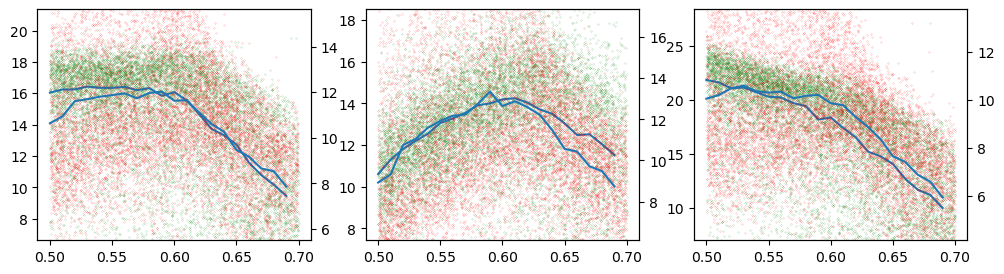

In [16]:
metrics = ['senm_t', 'frid_t', 'sasp_t']
fig, ax = plt.subplots(1, len(metrics))
fig.set_figwidth(4*len(metrics))
fig.set_figheight(3)

for m_i, m in enumerate(metrics):
    ax1 = ax[m_i]
    ax2 = ax1.twinx()
    axes = [ax1, ax2]
    colours = ['g', 'r']

    for df_i in range(0, NUM_SAMPLES):
        this_ax = axes[df_i]
        this_colour = colours[df_i]
        
        this_ax.scatter(gsdf['threshold'], gsdf[f'{m}_{df_i}'], c = this_colour, s = 0.01)

        plot_points = []
        boundaries = np.arange(0.5, 0.71, 0.01)
        for i, _ in enumerate(boundaries[:-1]):
            gsdf_subset = gsdf[(gsdf['threshold'] > boundaries[i]) & (gsdf['threshold'] < boundaries[i + 1])]
            plot_points.append(gsdf_subset[f'{m}_{df_i}'].quantile(0.5))

        this_ax.plot(boundaries[:-1], plot_points)
        ylims = (min(plot_points) * 0.7, max(plot_points) * 1.3)
        this_ax.set_ylim(bottom = ylims[0], top = ylims[1])


In [17]:
np.arange(0.5, 0.71, 0.01)[:-1]

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69])

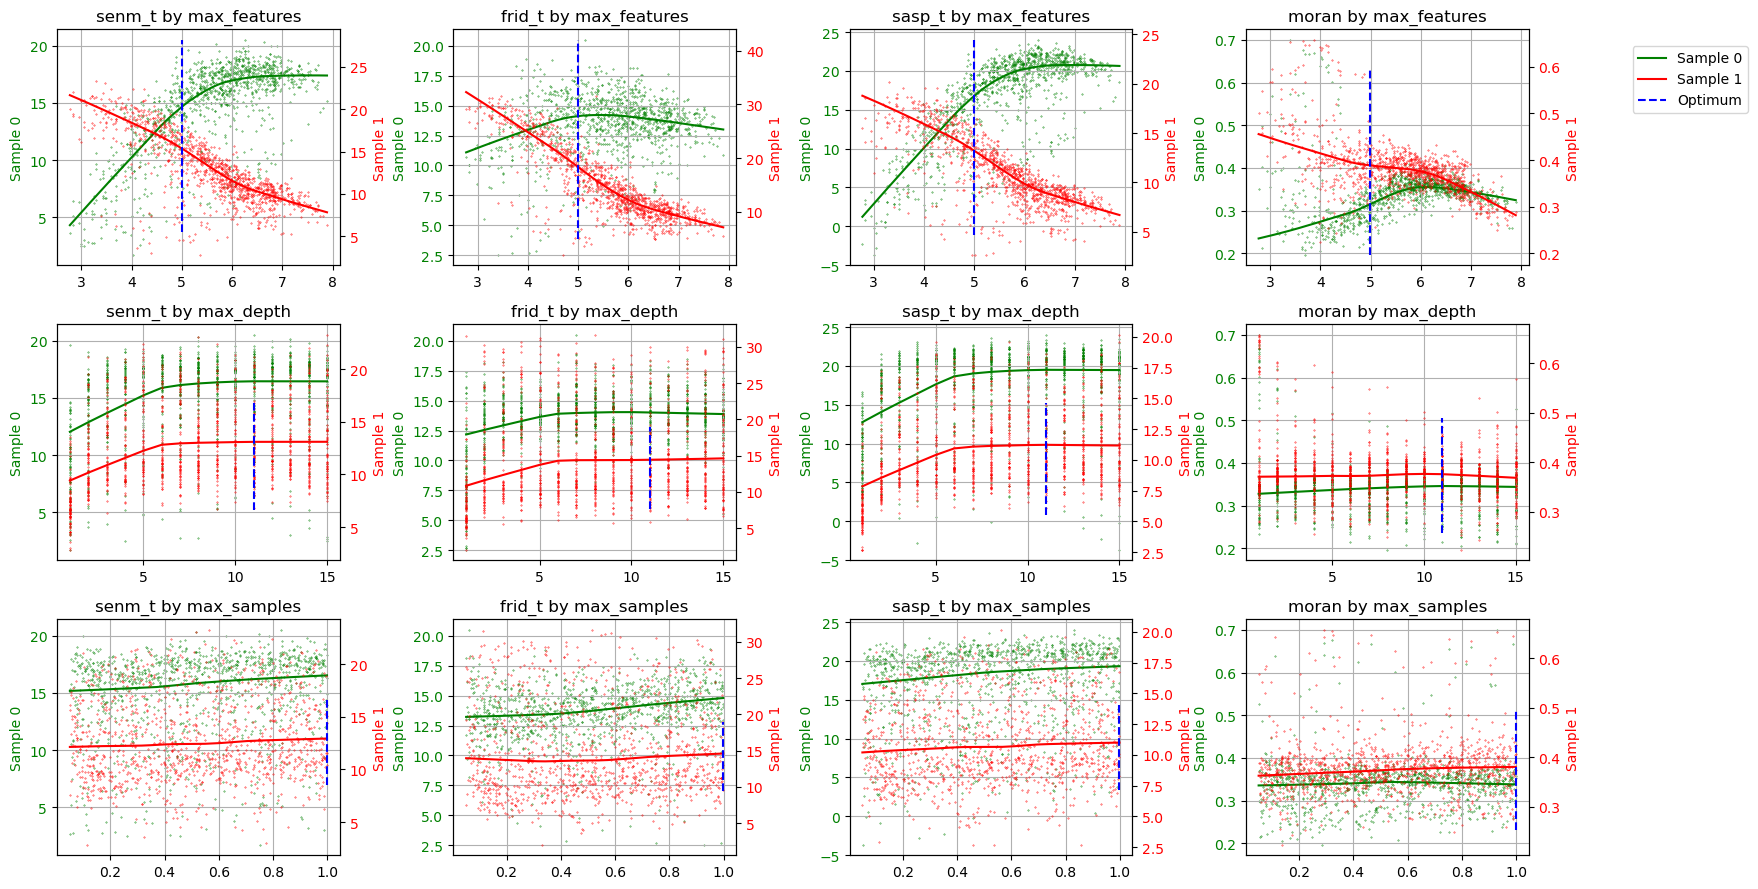

In [18]:
vars = ['max_features', 'max_depth', 'max_samples']
metrics = ['senm_t', 'frid_t', 'sasp_t', 'moran']
q = 0.0

gsdf_subset = gsdf[(gsdf['threshold'] > optima[-1] - 0.01) & (gsdf['threshold'] < optima[-1] + 0.01)]

fig, ax = plt.subplots(len(vars), len(metrics))
fig.set_figwidth(4*len(metrics))
fig.set_figheight(3*len(vars))

for v_i, v in enumerate(vars):
    for m_i, m in enumerate(metrics):
        ax1 = ax[v_i][m_i]
        ax2 = ax1.twinx()
        axes = [ax1, ax2]
        colours = ['g', 'r']

        # add lowess list structure, and do it like that
        # set the ylimits of the graph to make them easier to understand
        lowess = [None] *  NUM_SAMPLES
        
        for df_i in range(0, NUM_SAMPLES):
            this_ax = axes[df_i]
            this_colour = colours[df_i]
            
            this_ax.scatter(gsdf_subset[v], gsdf_subset[f'{m}_{df_i}'], c = this_colour, s = 0.1)
            
            lowess[df_i] = sm.nonparametric.lowess(
                gsdf_subset[f'{m}_{df_i}'],
                gsdf_subset[v]
            )
            this_ax.plot(
                lowess[df_i][:, 0],
                lowess[df_i][:, 1],
                c = this_colour,
                label = f'Sample {df_i}'
            )
            ylims = (lowess[df_i][:, 1].min() * 0.7, lowess[df_i][:, 1].max() * 1.3)
            #this_ax.set_ylim(bottom = ylims[0], top = ylims[1])
            
            this_ax.set_ylabel(f'Sample {df_i}', color = this_colour)
            this_ax.tick_params(axis = 'y', labelcolor = this_colour)

            #if v == 'max_features':
            #    this_ax.set_xscale('log')
        
        for l in lowess:
            l[:, 1] = l[:, 1] - l[:, 1].min()
            l[:, 1] = l[:, 1] / l[:, 1].max()

        lowess_total = np.zeros((len(lowess[0]), 2))
        lowess_total[:, 0] = lowess[0][:, 0]
        for l in lowess:
            lowess_total[:, 1] = lowess_total[:, 1] + l[:, 1]

        optimal_x = lowess_total[:, 0][np.argmax(lowess_total[:, 1])]
        ax2.vlines(optima[v_i], ylims[0], ylims[1], color = 'b', linestyles = 'dashed', label = 'Optimum')
        
        ax1.set_title(f'{m} by {v}')
        ax1.grid()

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
lines = [lines[0]] + lines[-2:]
labels = [labels[0]] + labels[-2:]
fig.legend(lines, labels, loc = 'upper right', bbox_to_anchor = (1.1, 0.95))

plt.tight_layout()
plt.show()

In [19]:
labels

['Sample 0', 'Sample 1', 'Optimum']

In [20]:
gsdf

,max_features,max_depth,max_samples,threshold,frid_t_0,frid_p_0,senm_t_0,senm_p_0,sasp_t_0,sasp_p_0,...,sasp_t_1,sasp_p_1,mt_t_1,mt_p_1,pct_tot_iso_1,pct_pos_iso_1,percent_pos_1,score_1,moran_1,geary_1
0,6.906755,1.0,0.867002,0.614782,8.569816,1.336470e-11,8.315957,3.547737e-11,9.949983,1.462481e-13,...,4.460405,2.071616e-05,-4.284447,9.999646e-01,0.014401,0.603774,0.023852,1.0000,0.331514,0.670524
1,7.083388,11.0,0.752816,0.671348,13.989771,2.838551e-35,14.873318,5.077183e-38,16.675979,1.200693e-45,...,8.686738,6.639783e-17,-6.726417,1.000000e+00,0.036904,0.288732,0.127813,1.0000,0.303547,0.696227
2,6.711740,15.0,0.720585,0.620369,15.294982,2.714264e-44,17.371458,1.620094e-53,20.415163,3.548231e-69,...,9.443321,6.172679e-20,-7.039744,1.000000e+00,0.039604,0.234667,0.168767,1.0000,0.340183,0.660708
3,5.602119,3.0,0.716765,0.570216,15.877813,2.106957e-46,17.279329,5.900873e-52,19.588677,2.161746e-63,...,11.977510,3.004452e-29,-4.839693,9.999991e-01,0.034203,0.222222,0.153915,1.0000,0.408553,0.593404
4,5.081404,6.0,0.359537,0.581143,10.749819,2.023286e-25,13.728748,2.434738e-38,17.099897,1.647365e-55,...,10.748724,1.373474e-24,-5.247040,9.999999e-01,0.040054,0.244505,0.163816,0.9875,0.384098,0.618869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9967,5.609472,13.0,0.813534,0.634865,15.852533,7.335343e-40,16.818579,1.830760e-42,19.421023,1.011599e-51,...,10.565893,7.463422e-21,-5.465056,9.999999e-01,0.018902,0.270968,0.069757,1.0000,0.404257,0.597195
9968,6.345636,6.0,0.900997,0.611276,14.876018,2.585721e-42,16.764916,1.534134e-50,19.449176,4.301198e-64,...,9.273853,1.912636e-19,-8.164175,1.000000e+00,0.041854,0.234848,0.178218,1.0000,0.368356,0.632478
9969,5.552960,8.0,0.180033,0.579472,12.734192,1.283800e-34,15.957566,1.103149e-50,19.366308,2.691518e-70,...,11.052635,3.605419e-27,-7.361873,1.000000e+00,0.040954,0.150662,0.271827,0.9875,0.405362,0.595551
9970,3.737670,9.0,0.493643,0.520025,12.894816,6.203389e-33,10.134558,1.040561e-22,6.842076,1.045492e-11,...,18.642718,1.763313e-72,10.406126,4.366653e-25,0.019352,0.037359,0.518002,0.9375,0.447672,0.554903


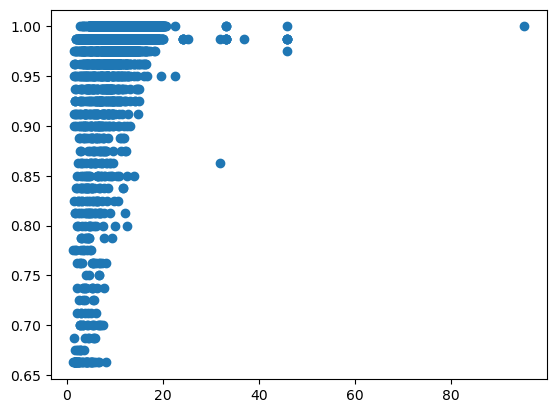

In [24]:
plt.scatter(
    gsdf['senm_t_0'],
    gsdf['score_0'],
)
plt.show()

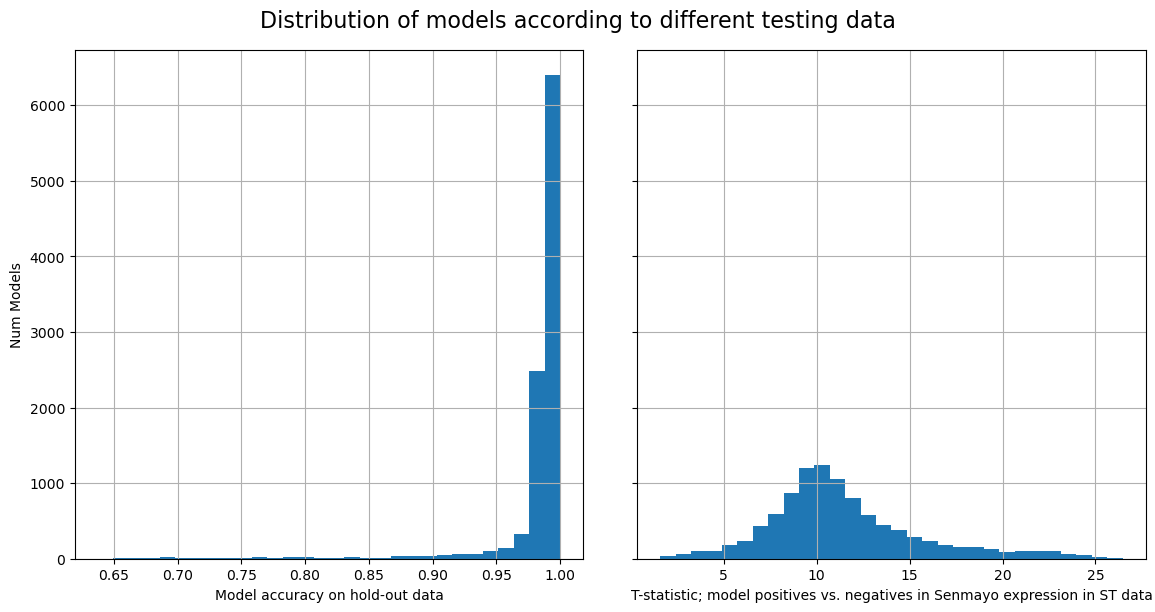

In [63]:
fig, ax = plt.subplots(1,2, sharey = True)
fig.set_figwidth(12)
fig.set_figheight(6)



ax[0].hist(gsdf['score_1'], bins = 30)
ax[0].set_xlabel('Model accuracy on hold-out data')
ax[0].set_ylabel('Num Models')
ax[0].grid()
ax[0].set_box_aspect(1)

ax[1].hist(gsdf['senm_t_1'], bins = 30)
ax[1].set_xlabel('T-statistic; model positives vs. negatives in Senmayo expression in ST data')
ax[1].grid()
ax[1].set_box_aspect(1)

fig.suptitle('Distribution of models according to different testing data', fontsize = 16)
plt.tight_layout()
plt.show()

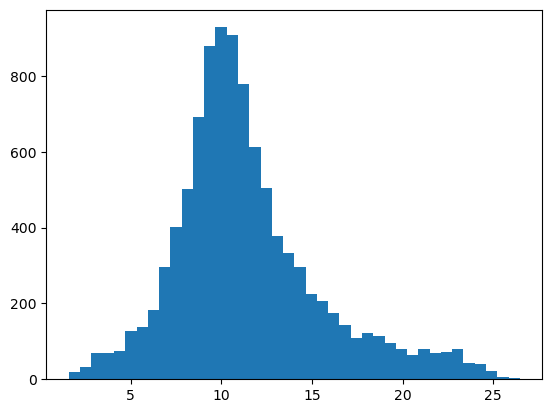

In [34]:
plt.hist(gsdf['senm_t_1'], bins = 40)
plt.show()